# Atividade - Aula 6 (SimpSOM)

In [1]:
### Self Organizing Map ###

## Importing the libraries ##

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Importing the dataset ##

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
## Feature Scaling ##
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
## Training the SOM ##

from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

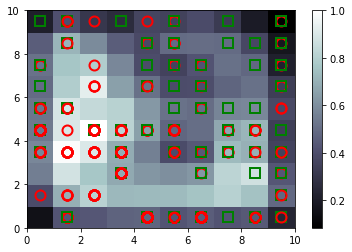

In [5]:
## Visualizing the results ##

from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [6]:
### Finding the frauds ###

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,3)], mappings[(7,3)]), axis = 0)
#frauds = sc.inverse_transform(frauds)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


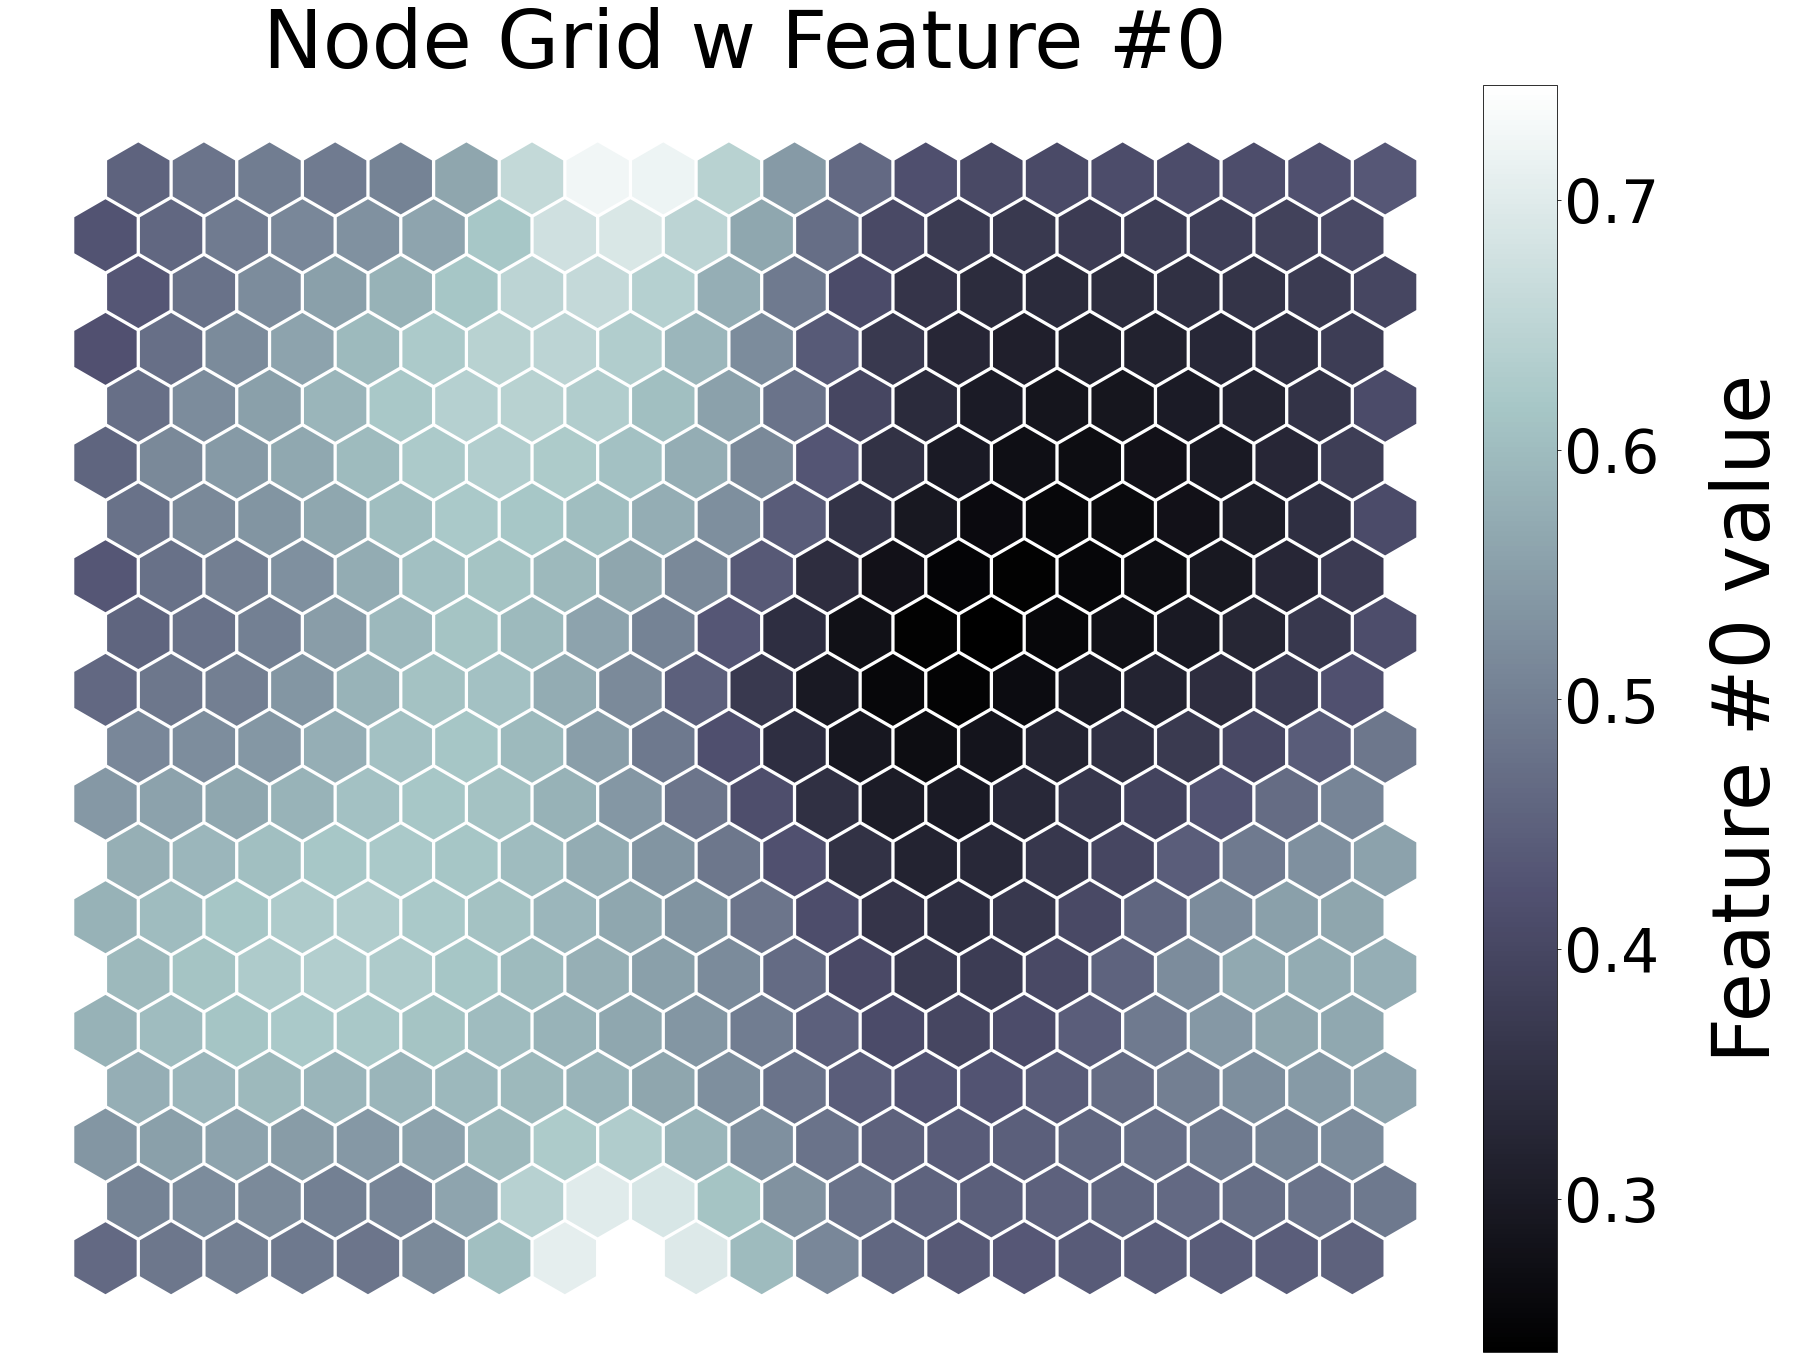

In [7]:
# Finding frauds with SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.5, 100)

net.save('filename_weights')
net.nodes_graph(colnum=0)

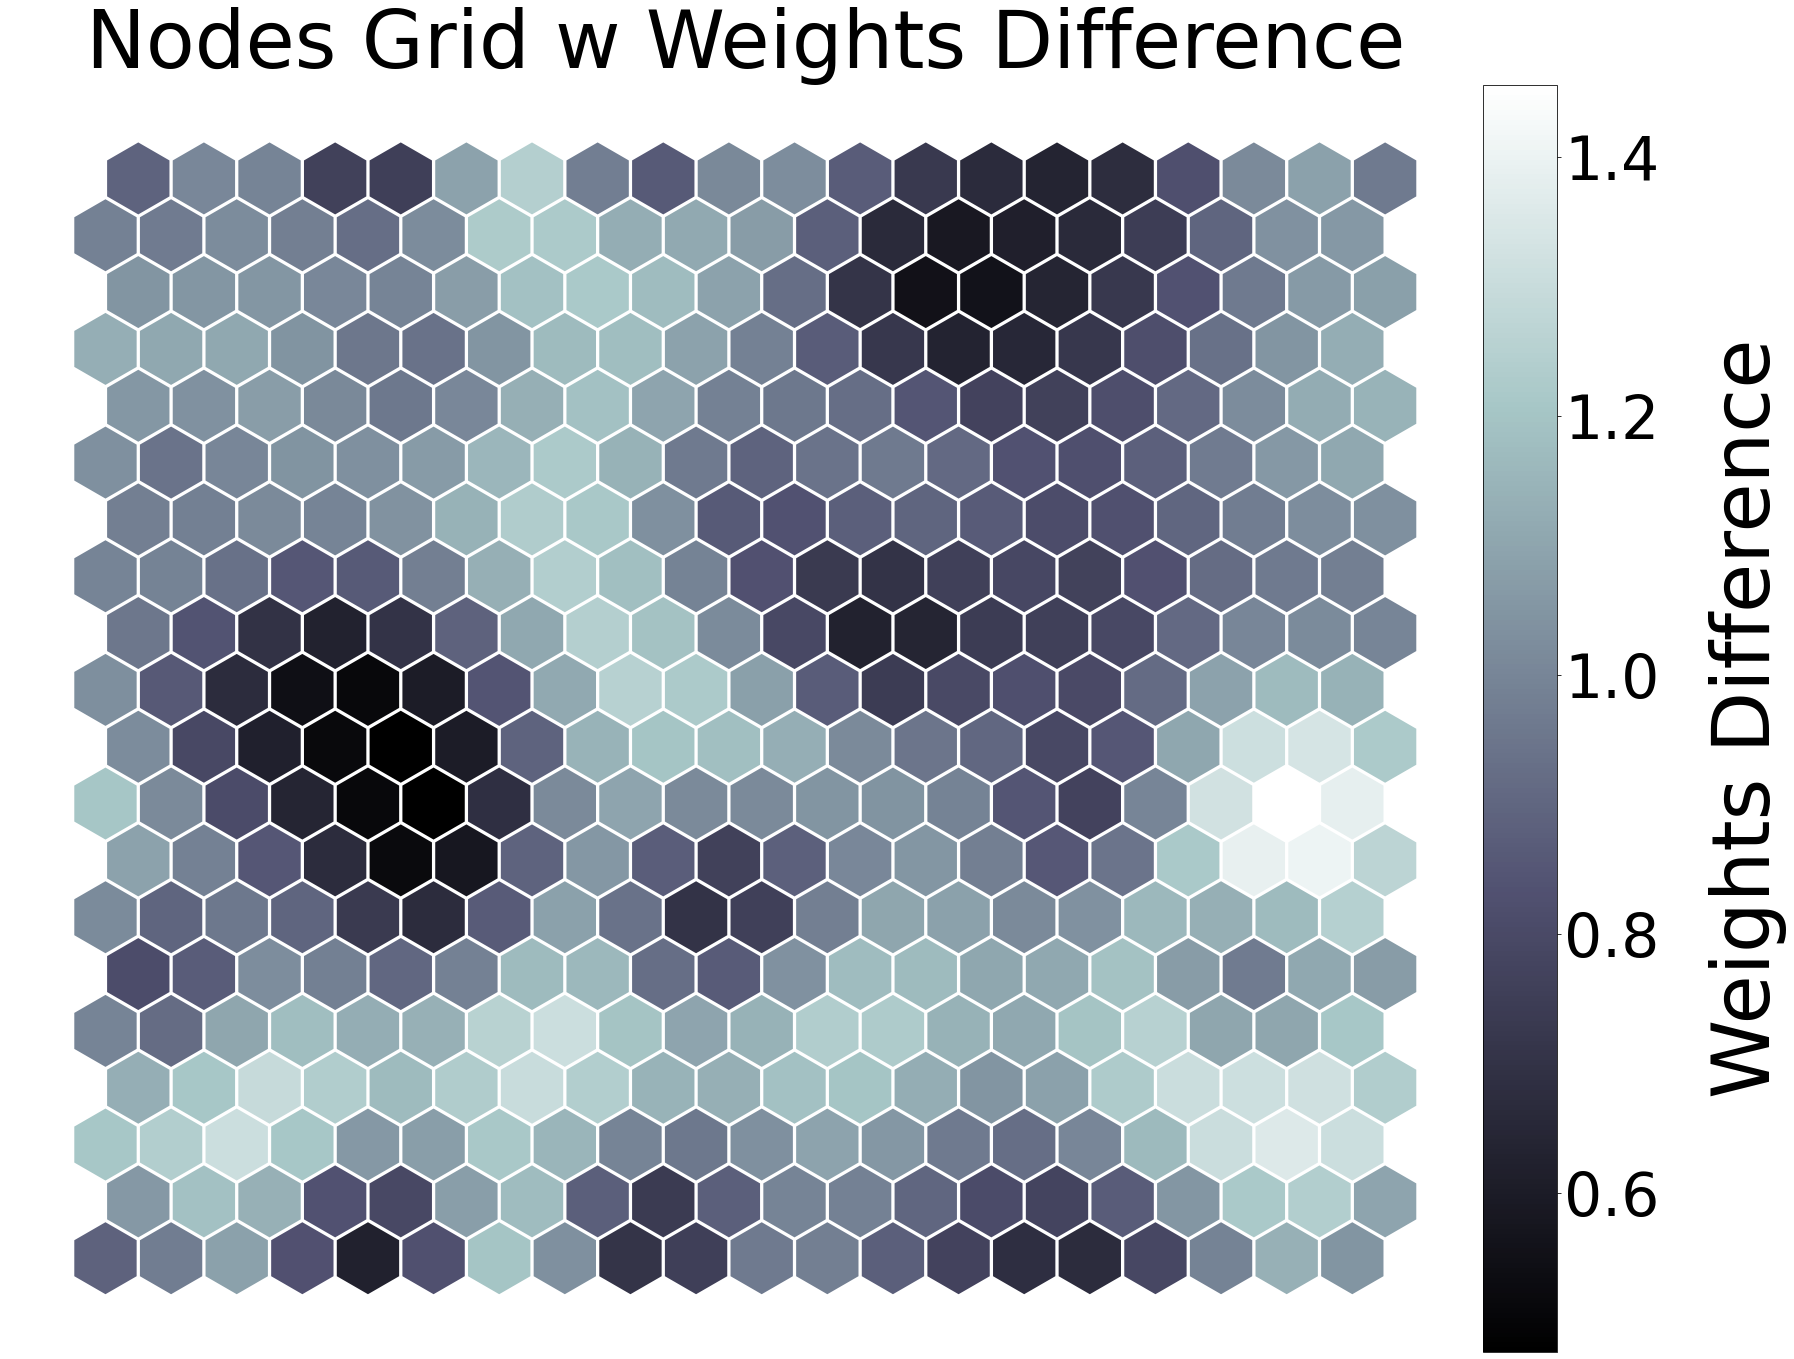

In [8]:
net.diff_graph()

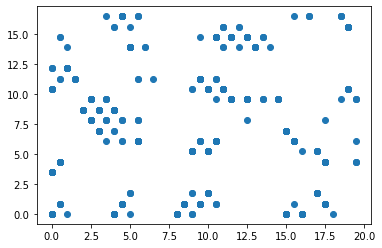

In [9]:
## Projecting the data points on the new 2D network map ##

prj = np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
dataset["clusters"]=kmeans.labels_

## SOM combined with k means gives me cluster 0 is related to fraud. ##

dataset[dataset["clusters"]==0].head(20) # First 20 frauds

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,clusters
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0,0
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0,0
10,15644446,1,33.50,1.750,2,14,8,4.500,1,1,4,1,2,253,858,1,0
11,15585892,1,41.42,5.000,2,11,8,5.000,1,1,6,1,2,470,1,1,0
12,15609356,1,20.67,1.250,1,8,8,1.375,1,1,3,1,2,140,211,0,0
13,15803378,1,34.92,5.000,2,14,8,7.500,1,1,6,1,2,0,1001,1,0
14,15599440,1,58.58,2.710,2,8,4,2.415,0,0,0,1,2,320,1,0,0
16,15683168,1,29.58,4.500,2,9,4,7.500,1,1,2,1,2,330,1,1,0
25,15714087,1,32.75,1.500,2,13,8,5.500,1,1,3,1,2,0,1,1,0
